<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Sklearn_Linear_Regression_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import sklearn
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [54]:
df = pd.read_csv('housing.data',delim_whitespace=True,header=None)

In [55]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.063,0.000,11.930,0,0.573,6.593,69.100,2.479,1,273.000,21.000,391.990,9.670,22.400
502,0.045,0.000,11.930,0,0.573,6.120,76.700,2.288,1,273.000,21.000,396.900,9.080,20.600
503,0.061,0.000,11.930,0,0.573,6.976,91.000,2.167,1,273.000,21.000,396.900,5.640,23.900
504,0.110,0.000,11.930,0,0.573,6.794,89.300,2.389,1,273.000,21.000,393.450,6.480,22.000


In [56]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [57]:
df.columns = col_name

In [58]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


In [59]:
X = df.iloc[:,:-1].values

In [60]:
y = df['MEDV'].values

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [62]:
model = LinearRegression()

In [63]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## Performance analysis

## Analysis Type 1: Residual Analysis

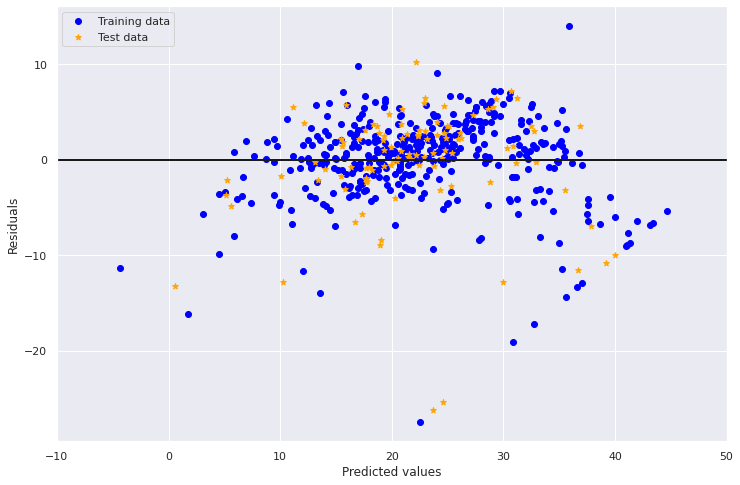

In [65]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

## Analysis Type 2: MSE Analysis

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
mean_squared_error(y_train,y_train_pred)

19.326470203585725

In [68]:
mean_squared_error(y_test,y_test_pred)

33.44897999767649

## Analysis Type 3: Coefficient of Determination R2

In [69]:
from sklearn.metrics import r2_score

In [70]:
r2_score(y_train,y_train_pred)

0.7730135569264234

In [72]:
r2_score(y_test,y_test_pred)

0.5892223849182514